In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import skimage
from skimage import io
import glob

import sklearn
from scipy.ndimage import gaussian_filter

## First we'll do background segmentation:

In [2]:
## Read in two mammo images: 
dense = io.imread('dense/mdb003.pgm')
fatty = io.imread('fatty/mdb005.pgm')

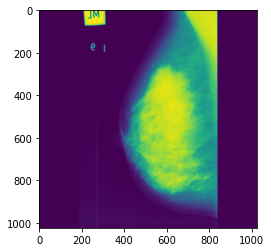

In [3]:
plt.imshow(dense)

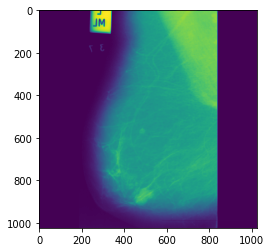

In [4]:
plt.imshow(fatty)

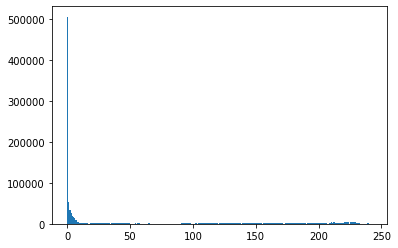

In [5]:
x = plt.hist(dense.ravel(),bins=256)

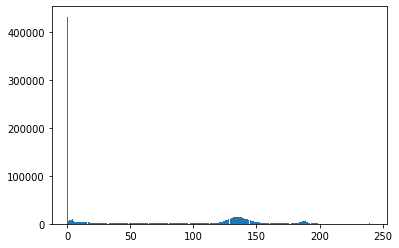

In [6]:
x = plt.hist(fatty.ravel(),bins=256)

In [7]:
## Next, experiment with different cut-off intensity thresholds to try to separate the background of the image
## From the histograms above, we might want to start with zero: 

thresh = 50

dense_bin = (dense > thresh) * 255
fatty_bin = (fatty > thresh) * 255

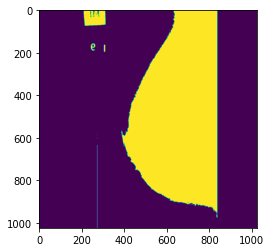

In [8]:
plt.imshow(dense_bin)

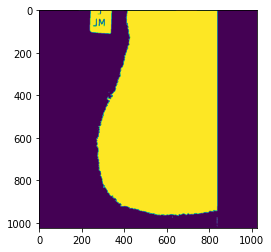

In [9]:
plt.imshow(fatty_bin)

Experiment with different values of 'thresh' above until you are satisfied that you are able to create a reasonable separation of tissue from background.

One image pre-processing trick you might try before binarizing is _smoothing_ which you perform with a gaussian filter. Try adding the following step before binarization: 

img_smooth = gaussian_filter(img, sigma = 5)

Where changing the value of _sigma_ will change the amount of smoothing. 

## Once you have chosen your value of threshold, let's use it to see if we can classify dense v. fatty breast tissue: 

In [10]:
## Let's first get all of the intensity values of the breast tissue for our fatty breast images using the
## segmentation method above: 
thresh = 50

fatty_imgs = glob.glob("fatty/*")
dense_imgs = glob.glob("dense/*")

In [11]:
fatty_intensities = []

for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())

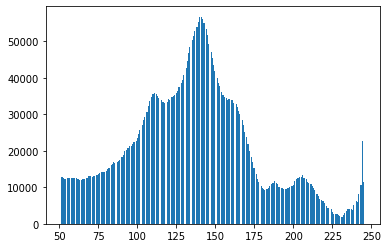

In [12]:
x = plt.hist(fatty_intensities,bins=256)

In [13]:
dense_intensities = []

for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())

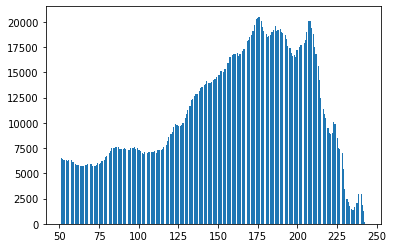

In [14]:
x = plt.hist(dense_intensities,bins=256)

In [15]:
scipy.stats.mode(fatty_intensities)[0][0]

140

In [16]:
scipy.stats.mode(dense_intensities)[0][0]

176

In [17]:
for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Fatty
Dense
Fatty
Dense
Fatty
Dense
Fatty
Fatty
Fatty
Fatty


In [18]:
for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense


Just by using this method, we're able to get 100% accuracy on dense images and 70% accuracy on fatty images! Now, we 'trained' on the same set of images that we validated on, so in order to be confident in this algorithm we need to validated on a separate held out set, which we'll learn about in the next lesson. 